# Higher Education Vs Salary Of Developers: EDA and Analysis
    Stack_Overflow 2018 Dataset


# Introduction
This feature aims to analyze the correlation between higher education levels and the salaries of developers surveyed in 2018. The analysis will help understand how different educational qualifications influence earning potential in the developer community.

In [1]:
#importing modules
import numpy as np                                  
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("../Data/survey_results_sample_2018.csv")         #data loading
df.head(10)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
5,8,Yes,No,United Kingdom,No,Employed full-time,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,Back-end developer;Database administrator;Fron...,...,1 - 2 times per week,Male,Straight or heterosexual,"Secondary school (e.g. American high school, G...",White or of European descent,18 - 24 years old,No,NaN,The survey was an appropriate length,Somewhat easy
6,9,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Back-end developer;Front-end developer;Full-st...,...,I don't typically exercise,Male,Straight or heterosexual,"Master‚Äôs degree (MA, MS, M.Eng., MBA, etc.)",White or of European descent,18 - 24 years old,No,No,The survey was an appropriate length,Somewhat easy
7,10,Yes,Yes,Nigeria,No,Employed full-time,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,Designer;Front-end developer;QA or test developer,...,1 - 2 times per week,Female,NaN,Primary/elementary school,Black or of African descent,25 - 34 years old,No,NaN,The survey was too long,Somewhat difficult
8,11,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning ...,Fine arts or performing arts (ex. graphic desi...,100 to 499 employees,"Back-end developer;C-suite executive (CEO, CTO...",...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,Yes,No,The survey was an appropriate length,Very easy
9,16,No,Yes,India,No,Employed full-time,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",500 to 999 employees,Designer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data Exploration

In [4]:
print(df.shape)


(99, 129)


In [5]:
df.dtypes

Respondent        int64
Hobby            object
OpenSource       object
Country          object
Student          object
                  ...  
Age              object
Dependents       object
MilitaryUS       object
SurveyTooLong    object
SurveyEasy       object
Length: 129, dtype: object

In [6]:
print(df.columns.tolist())

['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment', 'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType', 'YearsCoding', 'YearsCodingProf', 'JobSatisfaction', 'CareerSatisfaction', 'HopeFiveYears', 'JobSearchStatus', 'LastNewJob', 'AssessJob1', 'AssessJob2', 'AssessJob3', 'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7', 'AssessJob8', 'AssessJob9', 'AssessJob10', 'AssessBenefits1', 'AssessBenefits2', 'AssessBenefits3', 'AssessBenefits4', 'AssessBenefits5', 'AssessBenefits6', 'AssessBenefits7', 'AssessBenefits8', 'AssessBenefits9', 'AssessBenefits10', 'AssessBenefits11', 'JobContactPriorities1', 'JobContactPriorities2', 'JobContactPriorities3', 'JobContactPriorities4', 'JobContactPriorities5', 'JobEmailPriorities1', 'JobEmailPriorities2', 'JobEmailPriorities3', 'JobEmailPriorities4', 'JobEmailPriorities5', 'JobEmailPriorities6', 'JobEmailPriorities7', 'UpdateCV', 'Currency', 'Salary', 'SalaryType', 'ConvertedSalary', 'CurrencySymbol', 'CommunicationT

Parameters Relevant to our Analysis: Initial Observation
'FormalEducation' , 'UndergradMajor', 'SalaryType', 'ConvertedSalary', 

In [7]:
df['SalaryType'].value_counts()

Monthly    26
Yearly     22
Weekly      1
Name: SalaryType, dtype: int64

In [8]:
df['UndergradMajor'].value_counts()

Computer science, computer engineering, or software engineering          56
A natural science (ex. biology, chemistry, physics)                       7
Another engineering discipline (ex. civil, electrical, mechanical)        7
A business discipline (ex. accounting, finance, marketing)                5
Fine arts or performing arts (ex. graphic design, music, studio art)      4
Information systems, information technology, or system administration     3
Mathematics or statistics                                                 2
Web development or web design                                             2
A social science (ex. anthropology, psychology, political science)        1
A humanities discipline (ex. literature, history, philosophy)             1
Name: UndergradMajor, dtype: int64

In [9]:
df['FormalEducation'].value_counts()

Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)                                            44
Master‚Äôs degree (MA, MS, M.Eng., MBA, etc.)                                         29
Some college/university study without earning a degree                                17
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4
Associate degree                                                                       3
Name: FormalEducation, dtype: int64

Data Cleaning

In [10]:

print(df[['FormalEducation', 'UndergradMajor', 'SalaryType', 'ConvertedSalary']].isnull().sum())

FormalEducation     2
UndergradMajor     11
SalaryType         50
ConvertedSalary    53
dtype: int64


In [11]:
df2= df[['FormalEducation', 'UndergradMajor', 'SalaryType', 'ConvertedSalary']]

In [12]:
df2.isna().sum()

FormalEducation     2
UndergradMajor     11
SalaryType         50
ConvertedSalary    53
dtype: int64

In [13]:
# Drop rows where ConvertedSalary is NA
df2 = df2.dropna(subset=['ConvertedSalary'])
df2 = df2.dropna(subset=['UndergradMajor'])
# Drop rows where both FormalEducation and UndergradMajor are NA
df2 = df2.dropna(subset=['FormalEducation'])

# Display the first few rows to verify
print(df2.isna().sum())
print(df2.shape)

In [14]:
df3=df2.copy()
df3.head(5)

,FormalEducation,UndergradMajor,SalaryType,ConvertedSalary
1,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...",Yearly,70841.0
4,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yearly,21426.0
5,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",NaN,41671.0
6,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yearly,120000.0
8,Some college/university study without earning ...,Fine arts or performing arts (ex. graphic desi...,Yearly,250000.0


In [15]:
df2 = df2.dropna(subset=['SalaryType'])
df2.head(10)

,FormalEducation,UndergradMajor,SalaryType,ConvertedSalary
1,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...",Yearly,70841.0
4,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yearly,21426.0
6,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yearly,120000.0
8,Some college/university study without earning ...,Fine arts or performing arts (ex. graphic desi...,Yearly,250000.0
17,"Master‚Äôs degree (MA, MS, M.Eng., MBA, etc.)","A business discipline (ex. accounting, finance...",Monthly,47904.0
20,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...",Yearly,95968.0
22,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Monthly,420.0
24,"Master‚Äôs degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yearly,10958.0
25,"Master‚Äôs degree (MA, MS, M.Eng., MBA, etc.)","A natural science (ex. biology, chemistry, phy...",Monthly,51408.0
26,"Master‚Äôs degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yearly,72611.0


In [16]:
conversion_factors = {
    'Yearly': 1,
    'Monthly': 12,
    'Weekly': 52,
    
}

DATA ANALYSIS

In [17]:
# Function to convert salary to annual
def convert_to_annual(row):
    salary_type = row['SalaryType']
    salary = row['ConvertedSalary']
    return salary * conversion_factors[salary_type]

# Apply the function to each row
df2['NetSalary'] = df2.apply(convert_to_annual, axis=1)

# Verify the results
df2.head(10)

,FormalEducation,UndergradMajor,SalaryType,ConvertedSalary,NetSalary
1,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...",Yearly,70841.0,70841.0
4,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yearly,21426.0,21426.0
6,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yearly,120000.0,120000.0
8,Some college/university study without earning ...,Fine arts or performing arts (ex. graphic desi...,Yearly,250000.0,250000.0
17,"Master‚Äôs degree (MA, MS, M.Eng., MBA, etc.)","A business discipline (ex. accounting, finance...",Monthly,47904.0,574848.0
20,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...",Yearly,95968.0,95968.0
22,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Monthly,420.0,5040.0
24,"Master‚Äôs degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yearly,10958.0,10958.0
25,"Master‚Äôs degree (MA, MS, M.Eng., MBA, etc.)","A natural science (ex. biology, chemistry, phy...",Monthly,51408.0,616896.0
26,"Master‚Äôs degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yearly,72611.0,72611.0


In [18]:
# Average and median NetSalary by FormalEducation
education_salary_stats = df2.groupby('FormalEducation')['NetSalary'].agg(['mean', 'median', 'count'])
print(education_salary_stats)


                                                             mean    median  \
FormalEducation                                                               
Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)          897724.866667   80000.0   
Master‚Äôs degree (MA, MS, M.Eng., MBA, etc.)       235090.857143  100354.0   
Some college/university study without earning a...  444953.111111  254736.0   

                                                    count  
FormalEducation                                            
Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)             15  
Master‚Äôs degree (MA, MS, M.Eng., MBA, etc.)          14  
Some college/university study without earning a...      9  


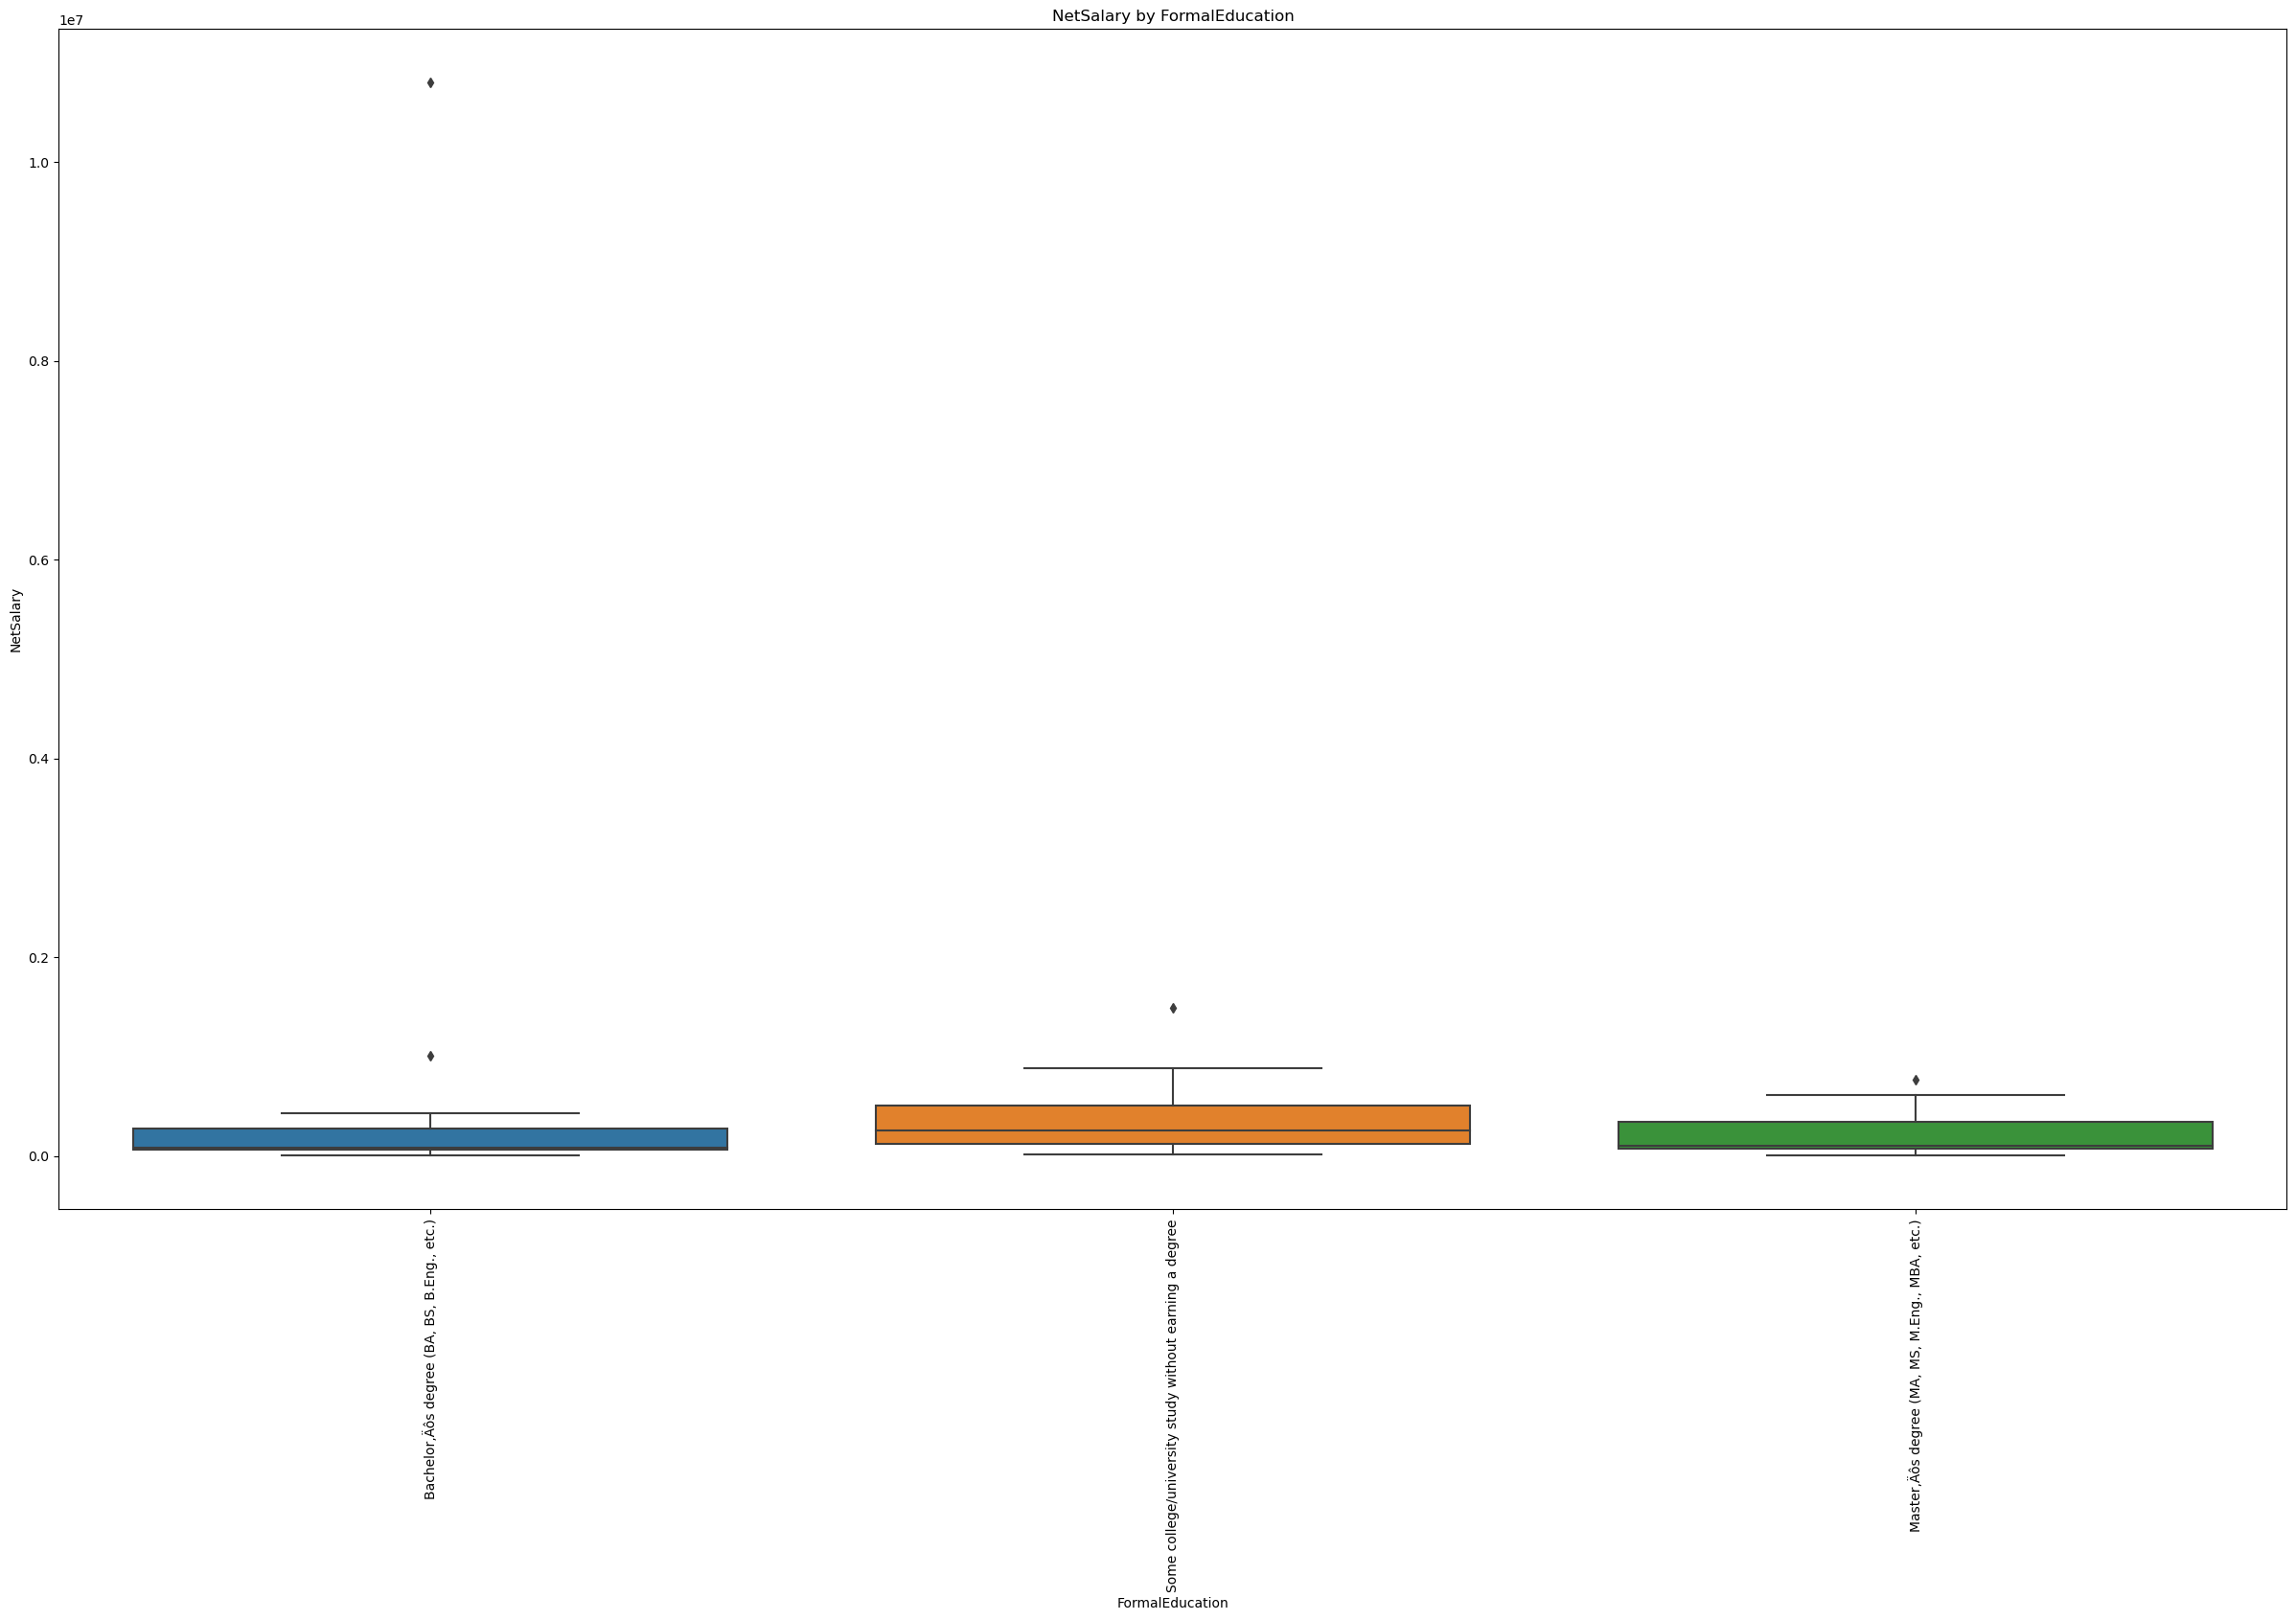

In [19]:
# Box plot for NetSalary by FormalEducation
plt.figure(figsize=(30, 16))
sns.boxplot(x='FormalEducation', y='NetSalary', data=df2)
plt.xticks(rotation=90)
plt.title('NetSalary by FormalEducation')
plt.show()

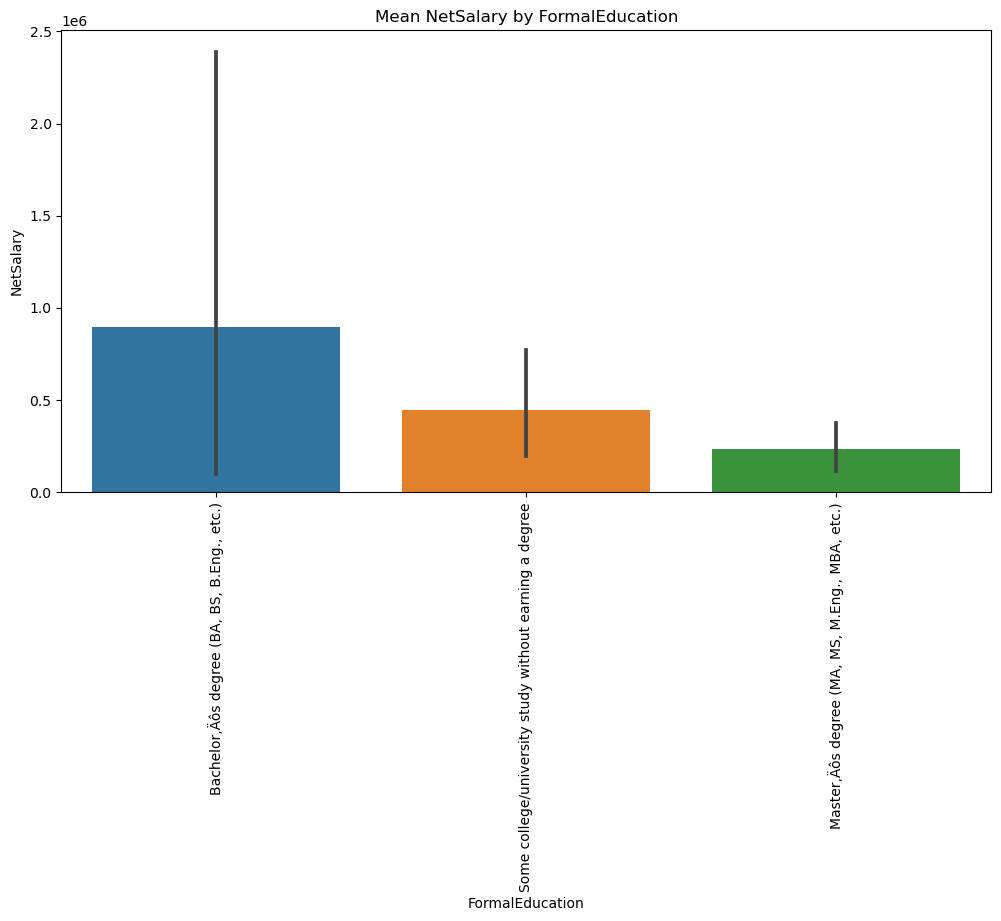

In [20]:
# Descriptive statistics
plt.figure(figsize=(12, 6))
sns.barplot(x='FormalEducation', y='NetSalary', data=df2, estimator=np.mean)
plt.xticks(rotation=90)
plt.title('Mean NetSalary by FormalEducation')
plt.show()

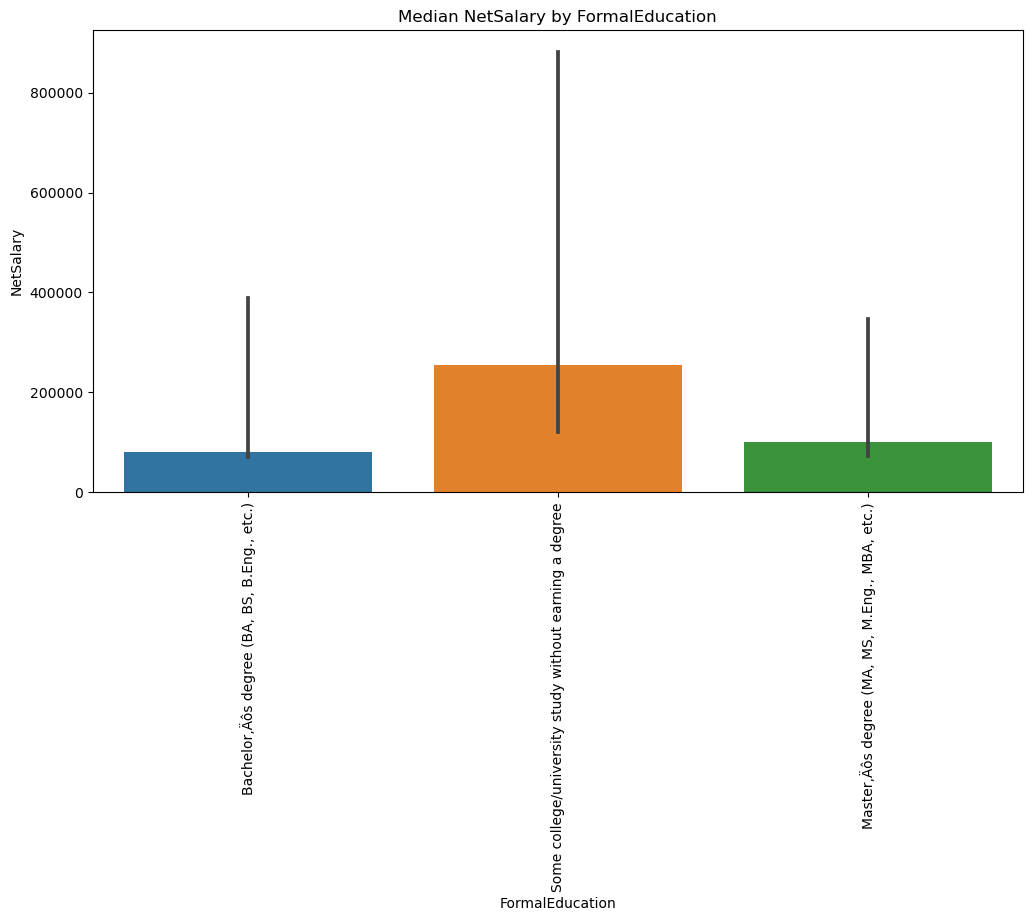

In [21]:
# Descriptive statistics
plt.figure(figsize=(12, 6))
sns.barplot(x='FormalEducation', y='NetSalary', data=df2, estimator=np.median)
plt.xticks(rotation=90)
plt.title('Median NetSalary by FormalEducation')
plt.show()

Bar Plot: Mean_NetSalary & Median_NetSalary by FormalEducation

1) Higher Salary without Degree: The bar plot shows that individuals with "Some college/university study without earning a degree" have the highest median NetSalary. This is an unusual finding and might suggest that those without degrees who are earning high salaries have other significant qualifications or experience.
2) Bachelor's Degree: Individuals with a "Bachelor’s degree (BA, BS, B.Eng., etc.)" have a lower mean NetSalary compared to those with some college education but no degree.
3) Master's Degree: Those with a "Master’s degree (MA, MS, M.Eng., MBA, etc.)" have a slightly higher mean NetSalary compared to Bachelor's degree holders but still lower than those with some college education but no degree.
4) Secondary School: The plot does not show bars for secondary school education, which might indicate there are no or very few individuals with just a secondary school education in the dataset, or their salaries are significantly lower and not visually represented well in the plot.

Box Plot: NetSalary by FormalEducation
1) Outliers: There are significant outliers in the "Some college/university study without earning a degree" and "Bachelor’s degree" categories. These outliers represent individuals earning much higher salaries than their peers.
2) Salary Ranges: The interquartile range (IQR) for "Some college/university study without earning a degree" is wider compared to other education levels, indicating more variability in salaries.



OBSERVATIONS FROM THE BARPLOT AND BOXPLOT:

1) Pursuing a Master's Degree: Individuals with a Master's degree have a slightly higher median and mean salary compared to those with a Bachelor's degree. This suggests that pursuing a Master's degree can lead to a moderate increase in salary, although the increase is not as substantial as one might expect.
2) The "Some college/university study without earning a degree" category shows the highest median and mean salary among all education levels. This indicates that even without a formal degree, individuals with significant skills and experience can command high salary packages. This observation is especially notable as it emphasizes the value of practical skills and experience in the job market.
3) Secondary School Education: Individuals with only secondary school education have the lowest median and mean salaries, highlighting that we should pursue Higher Education.
4) Outliers: The presence of significant outliers in both the "Some college/university study without earning a degree" and "Bachelor’s degree" categories suggests that there are individuals in these groups earning exceptionally high salaries. These outliers may represent individuals with unique qualifications, high-demand skills, or positions in lucrative industries.
5) Variability in Salaries: The wider interquartile range (IQR) and presence of outliers in the "Some college/university study without earning a degree" category indicate a high variability in salaries. This suggests that while some individuals without degrees can earn very high salaries, there is also a broad range of earnings within this group.

In [22]:
# Statistical testing
import scipy.stats as stats
anova_education = stats.f_oneway(*(df2[df2['FormalEducation'] == edu]['NetSalary'] for edu in df2['FormalEducation'].unique()))
print('ANOVA for NetSalary by FormalEducation:', anova_education)

ANOVA for NetSalary by FormalEducation: F_onewayResult(statistic=0.5320673146678855, pvalue=0.5920648151779178)


ANOVA for NetSalary by FormalEducation: F_onewayResult(statistic=0.43624509740464823, pvalue=0.7283596208876479)

The ANOVA results suggest that there is no statistically significant difference in NetSalary across different levels of FormalEducation. This means that, based on the data, FormalEducation alone does not have a significant impact on NetSalary.

In [23]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=df2['NetSalary'], groups=df2['FormalEducation'], alpha=0.05)

# Print the results
print(tukey)

                                                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                                                    
                    group1                                            group2                           meandiff   p-adj      lower        upper     reject
----------------------------------------------------------------------------------------------------------------------------------------------------------
   Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)          Master‚Äôs degree (MA, MS, M.Eng., MBA, etc.) -662634.0095 0.5741 -2264354.3435  939086.3244  False
   Bachelor‚Äôs degree (BA, BS, B.Eng., etc.) Some college/university study without earning a degree -452771.7556 0.8158 -2270111.2887 1364567.7776  False
Master‚Äôs degree (MA, MS, M.Eng., MBA, etc.) Some college/university study without earning a degree   209862.254 0.9581 -1631655.8081  2051380.316  False
----------------------------------------------------------------------

CONCLUSION FROM 'FORMAL EDUCATION'
Therefore, while there may be observable differences in the mean salaries, they are not statistically significant enough to infer that one educational level consistently results in a higher or lower salary than another.
This suggests that other factors besides formal education level might be playing a more critical role in determining salaries, such as work experience, industry, geographic location, or specific skill sets.

In [24]:

# Average and median NetSalary by UndergradMajor
major_salary_stats = df2.groupby('UndergradMajor')['NetSalary'].agg(['mean', 'median', 'count'])
major_salary_stats['mean'] = major_salary_stats['mean'].round(3)
print(major_salary_stats)


                                                            mean      median  \
UndergradMajor                                                                 
A business discipline (ex. accounting, finance,...  4.910880e+05    509472.0   
A humanities discipline (ex. literature, histor...  4.320000e+05    432000.0   
A natural science (ex. biology, chemistry, phys...  2.467880e+05     70841.0   
A social science (ex. anthropology, psychology,...  1.080000e+07  10800000.0   
Another engineering discipline (ex. civil, elec...  5.025752e+05     95968.0   
Computer science, computer engineering, or soft...  2.012078e+05    115000.0   
Fine arts or performing arts (ex. graphic desig...  2.500000e+05    250000.0   
Mathematics or statistics                           8.264800e+04     82648.0   
Web development or web design                       4.400000e+04     44000.0   

                                                    count  
UndergradMajor                                             

In [26]:

import scipy.stats as stats

# Perform ANOVA on the filtered data
anova_major = stats.f_oneway(*(df2[df2['UndergradMajor'] == major]['NetSalary'] for major in df2['UndergradMajor'].unique()))
print('ANOVA for NetSalary by UndergradMajor:', anova_major)



ANOVA for NetSalary by UndergradMajor: F_onewayResult(statistic=121.02161297389488, pvalue=3.625505738330034e-20)


ANOVA for NetSalary by UndergradMajor: F_onewayResult(statistic=121.02161297389488, pvalue=3.62550573833004e-20)

The ANOVA results show that there is a statistically significant difference in NetSalary across different UndergradMajor categories. This means that the field of study in one's undergraduate education has a significant impact on their net salary.

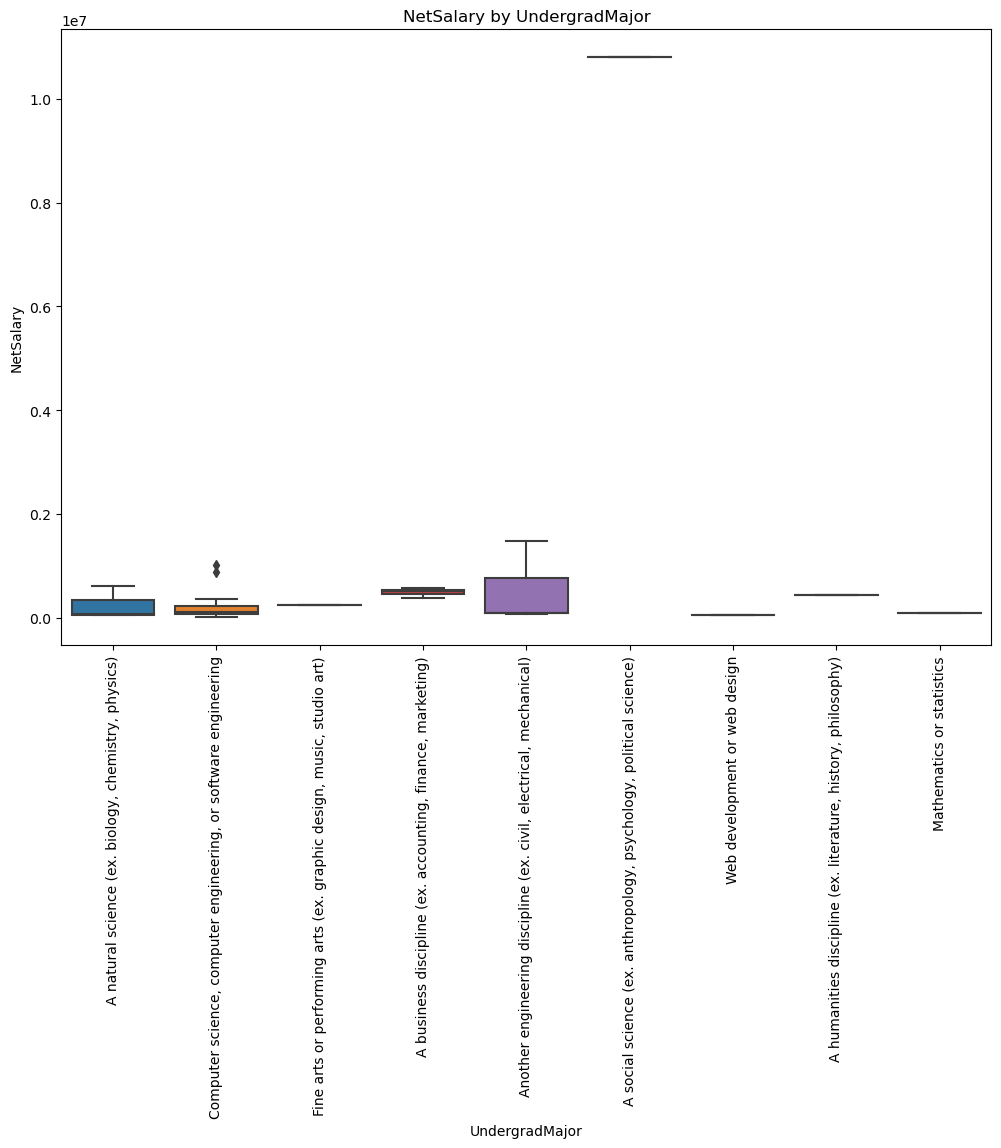

In [27]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='UndergradMajor', y='NetSalary', data=df2)
plt.xticks(rotation=90)
plt.title('NetSalary by UndergradMajor')
plt.show()


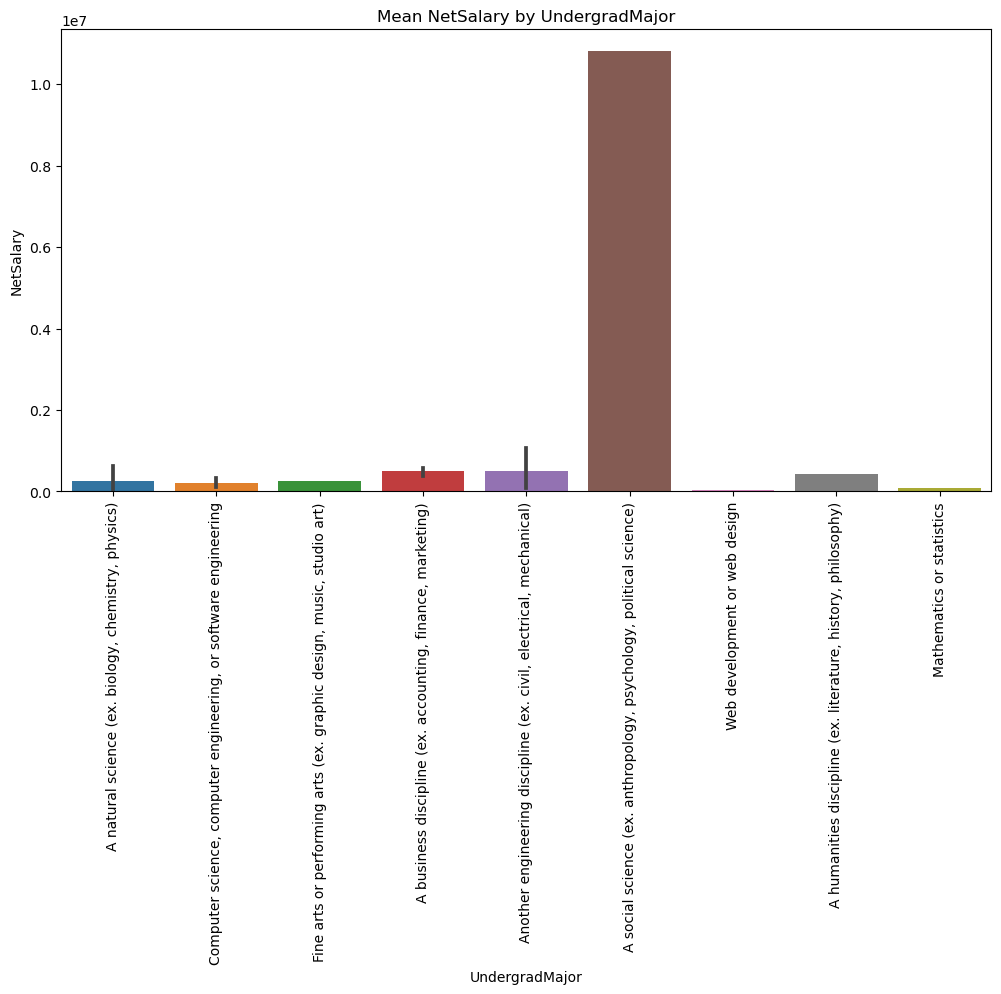

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(x='UndergradMajor', y='NetSalary', data=df2, estimator=np.mean)
plt.xticks(rotation=90)
plt.title('Mean NetSalary by UndergradMajor')
plt.show()

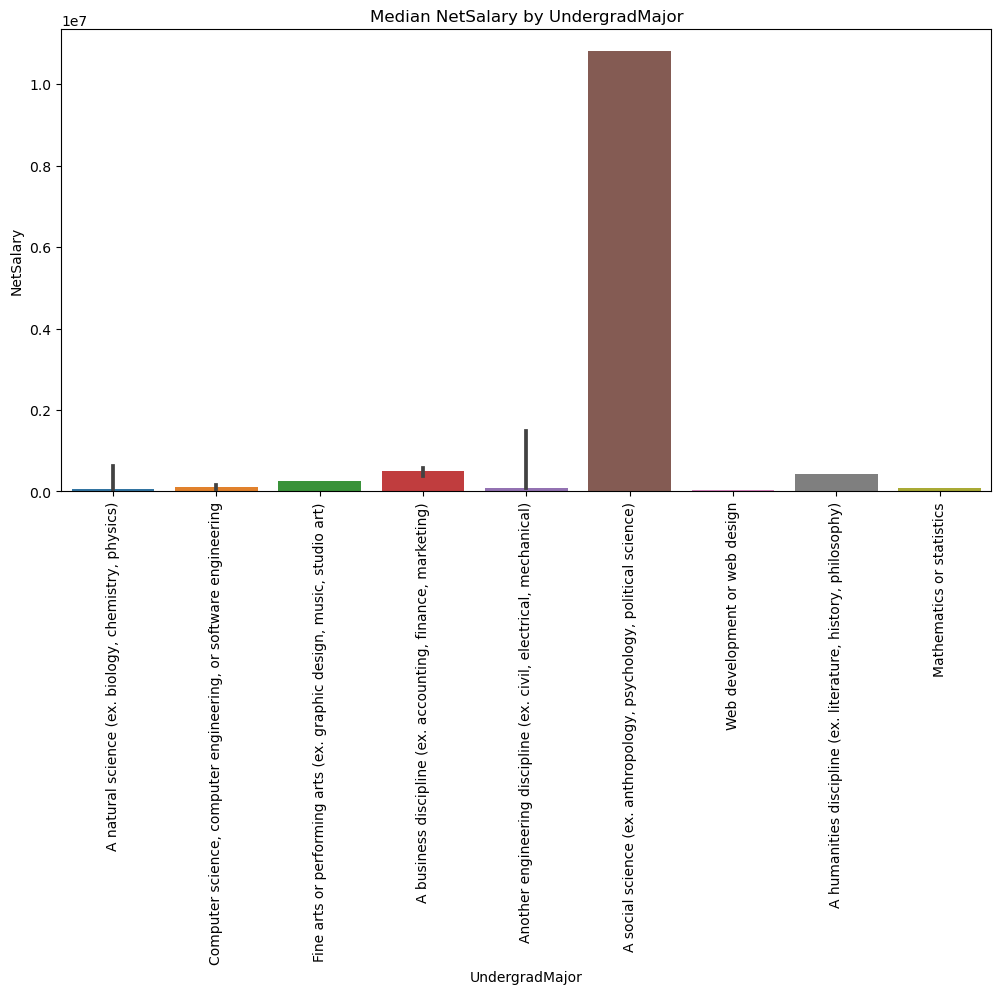

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(x='UndergradMajor', y='NetSalary', data=df2, estimator=np.median)
plt.xticks(rotation=90)
plt.title('Median NetSalary by UndergradMajor')
plt.show()

In [30]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=df2['NetSalary'], groups=df2['UndergradMajor'], alpha=0.05)

# Print the results
print(tukey)


                                                                        Multiple Comparison of Means - Tukey HSD, FWER=0.05                                                                        
                               group1                                                               group2                                   meandiff    p-adj      lower          upper     reject
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
          A business discipline (ex. accounting, finance, marketing)        A humanities discipline (ex. literature, history, philosophy)       -59088.0    1.0   -1353139.969   1234963.969  False
          A business discipline (ex. accounting, finance, marketing)                  A natural science (ex. biology, chemistry, physics)      -244300.0 0.9916  -1159332.9225   670732.9225  False
          A business

Presence of Outliers:

The box plot for social sciences (e.g., anthropology, psychology, political science) shows an extreme outlier, indicating there is a salary significantly higher than the rest within this major.
Computer science, engineering, and fine arts majors also show some smaller outliers, indicating occasional higher or lower salaries compared to the majority.

Comparison of Medians:

The median salary is highest for business disciplines among the typical ranges, excluding the extreme outlier in social sciences.

Humanities and mathematics/statistics majors have the lowest median salaries.

Engineering and computer science majors generally have higher median salaries compared to fine arts and humanities.

Engineering disciplines show a longer range, indicating more salary variation.

Web development/design and humanities have shorter whiskers, suggesting less variation in salaries.

Mathematics or Statistics: Salaries are low with minimal variation.

INSIGHTS:


Highest Earning Potential:

Social Sciences: With a mean and median salary of 10,800,000.00, this field has significantly higher earnings, likely due to lack of data.

Consistent Earnings:

1) Business Discipline: Both the mean and median are around 491,088.00, suggesting consistent and relatively high earning potential.
2) Humanities: Consistent earnings with both mean and median at 432,000.00.
3) Engineering and Computer Science:
Other Engineering: Mean salary is 502,575.20, with a median lower at 95,968.00, indicating some people, added with unique skills and experience, can earn signficantly greater than the rest
Computer Science: Mean salary is 201,207.80 with a median higher at 115,000.00, indicating steady earnings potential.
Fine Arts:
4) Fine Arts: Has a mean and median salary of 250,000.00, showing consistent earnings for graduates in this field.
5) Lower Earning Potential: Web Development: Lowest mean and median salary at 44,000.00.
6) Mathematics or Statistics: Lower salary range with mean and median at 82,648.00.

Education Level Impact:

1) Bachelor's Degree: While having the highest mean salary (897,724.87), the median is relatively low at 80,000.00, indicating potential high outliers.
2) Master's Degree: Higher median salary at 100,354.00 compared to bachelor's degree, suggesting additional education can improve earning potential.
3) Some College/University: Interestingly, has a high median salary at 254,736.00, indicating individuals who pursue specific high-earning skills without completing a degree.

Performing Two-Way ANOVA

To examine the combined effect of FormalEducation and UndergradMajor on NetSalary

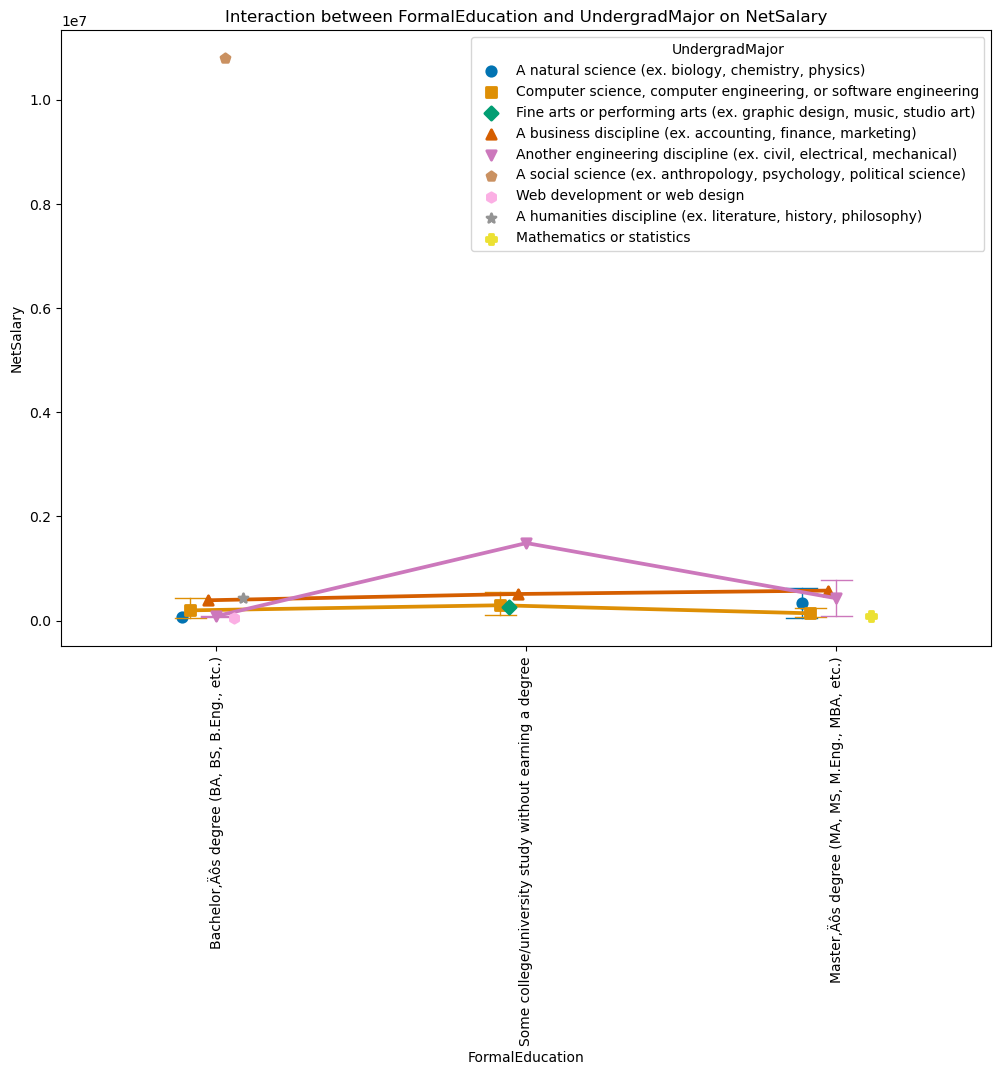

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.pointplot(data=df2, x='FormalEducation', y='NetSalary', hue='UndergradMajor', dodge=True, markers=["o", "s", "D", "^", "v", "p", "h", "*", "P"], capsize=.1, errwidth=1, palette="colorblind")
plt.xticks(rotation=90)
plt.title('Interaction between FormalEducation and UndergradMajor on NetSalary')
plt.show()



General Trend:
The most significant salaries are observed in the "Some College/University study without earning a degree" category for certain majors.
Master's Degree:

A noticeable outlier is seen for the natural sciences, which shows a significantly higher NetSalary.

Natural Sciences:
Very high salary for Master's degree.
Social Sciences:
Peaks significantly at "Some College/University study without earning a degree" but returns to lower levels for Bachelor's and Master's degrees.

Outliers:

There are significant outliers in the data. For instance, the natural sciences major with a Master's degree shows an unusually high NetSalary.

Implications:

Higher education (such as a Master's degree) in natural sciences may lead to higher salaries.

Some College/University study without a degree in social sciences may offer better salary prospects than expected.

For most other fields, the degree level does not significantly impact the NetSalary.

Recommendations:

For students pursuing higher salaries, focusing on natural sciences and aiming for a Master's degree might be beneficial.

Those interested in social sciences might explore opportunities even with incomplete higher education.

In [32]:
df['YearsCodingProf'].value_counts()

3-5 years      26
0-2 years      22
6-8 years      12
9-11 years      9
12-14 years     6
18-20 years     3
21-23 years     3
24-26 years     2
15-17 years     1
Name: YearsCodingProf, dtype: int64

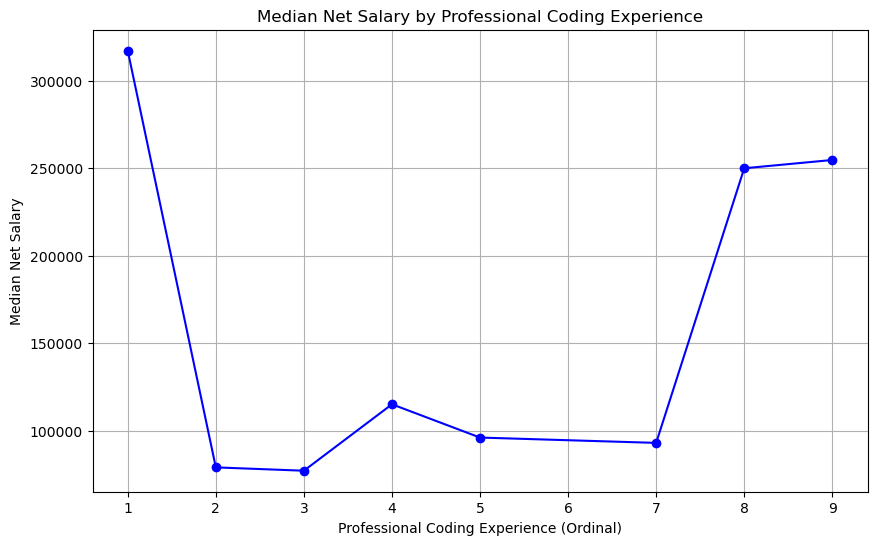

In [33]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
experience_mapping = {
    '0-2 years': 1,
    '3-5 years': 2,
    '6-8 years': 3,
    '9-11 years': 4,
    '12-14 years': 5,
    '15-17 years': 6,
    '18-20 years': 7,
    '21-23 years': 8,
    '24-26 years': 9
}
df2['ProfCodOrdinal'] = df['YearsCodingProf'].map(experience_mapping)
# Calculate median NetSalary for each ProfCodOrdinal
median_salaries = df2.groupby('ProfCodOrdinal')['NetSalary'].median().reset_index()

# Plot the median NetSalary against ProfCodOrdinal
plt.figure(figsize=(10, 6))
plt.plot(median_salaries['ProfCodOrdinal'], median_salaries['NetSalary'], marker='o', linestyle='-', color='b')
plt.xlabel('Professional Coding Experience (Ordinal)')
plt.ylabel('Median Net Salary')
plt.title('Median Net Salary by Professional Coding Experience')
plt.grid(True)
plt.show()



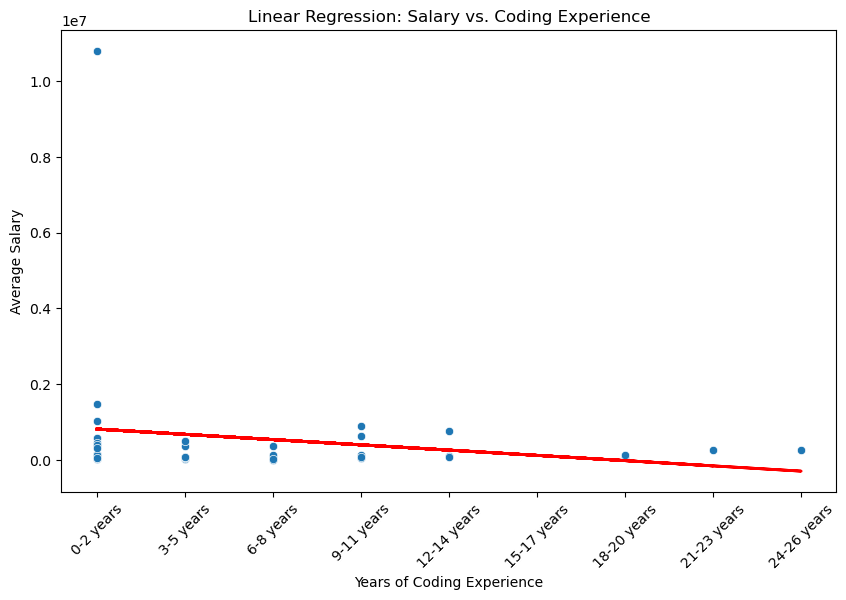

Correlation coefficient: -0.17
Intercept: 952327.47
Coefficient: -138979.47


In [34]:
# Linear regression
X = df2[['ProfCodOrdinal']]
y = df2['NetSalary']
reg = LinearRegression().fit(X, y)
df2['PredictedSalary'] = reg.predict(X)

# Plot regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ProfCodOrdinal', y='NetSalary', data=df2)
plt.plot(df2['ProfCodOrdinal'], df2['PredictedSalary'], color='red', linewidth=2)
plt.xticks(ticks=np.arange(1, 10), labels=experience_mapping.keys(), rotation=45)
plt.xlabel('Years of Coding Experience')
plt.ylabel('Average Salary')
plt.title('Linear Regression: Salary vs. Coding Experience')
plt.show()

# Correlation coefficient
correlation = df2['ProfCodOrdinal'].corr(df2['NetSalary'])
print(f"Correlation coefficient: {correlation:.2f}")

# Regression coefficients
print(f"Intercept: {reg.intercept_:.2f}")
print(f"Coefficient: {reg.coef_[0]:.2f}")

In [35]:
df['YearsCoding'].value_counts()

3-5 years           20
6-8 years           18
9-11 years          17
0-2 years           15
15-17 years          7
12-14 years          7
18-20 years          6
24-26 years          5
30 or more years     3
21-23 years          1
Name: YearsCoding, dtype: int64

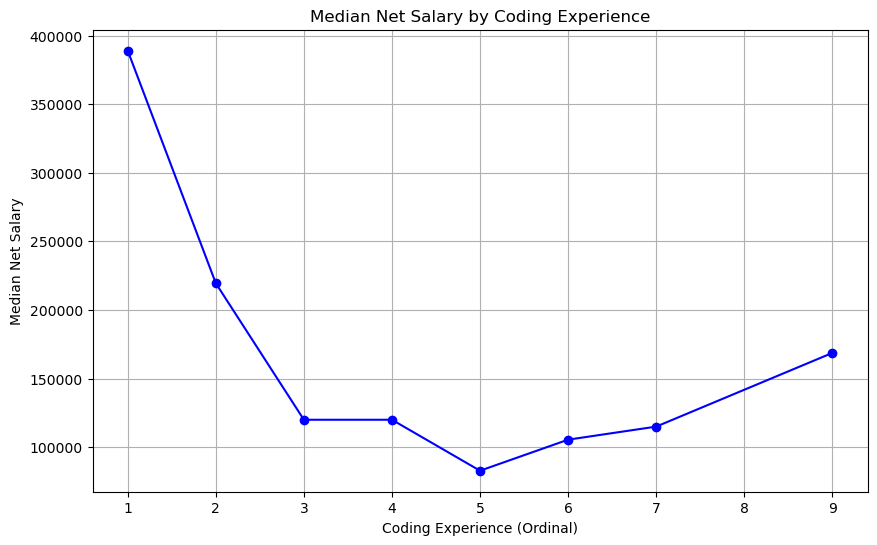

In [36]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
experience_mapping = {
    '0-2 years': 1,
    '3-5 years': 2,
    '6-8 years': 3,
    '9-11 years': 4,
    '12-14 years': 5,
    '15-17 years': 6,
    '18-20 years': 7,
    '21-23 years': 8,
    '24-26 years': 9
}
df2['CodOrdinal'] = df['YearsCoding'].map(experience_mapping)
# Calculate median NetSalary for each ProfCodOrdinal
median_salaries = df2.groupby('CodOrdinal')['NetSalary'].median().reset_index()

# Plot the median NetSalary against CodOrdinal
plt.figure(figsize=(10, 6))
plt.plot(median_salaries['CodOrdinal'], median_salaries['NetSalary'], marker='o', linestyle='-', color='b')
plt.xlabel('Coding Experience (Ordinal)')
plt.ylabel('Median Net Salary')
plt.title('Median Net Salary by Coding Experience')
plt.grid(True)
plt.show()



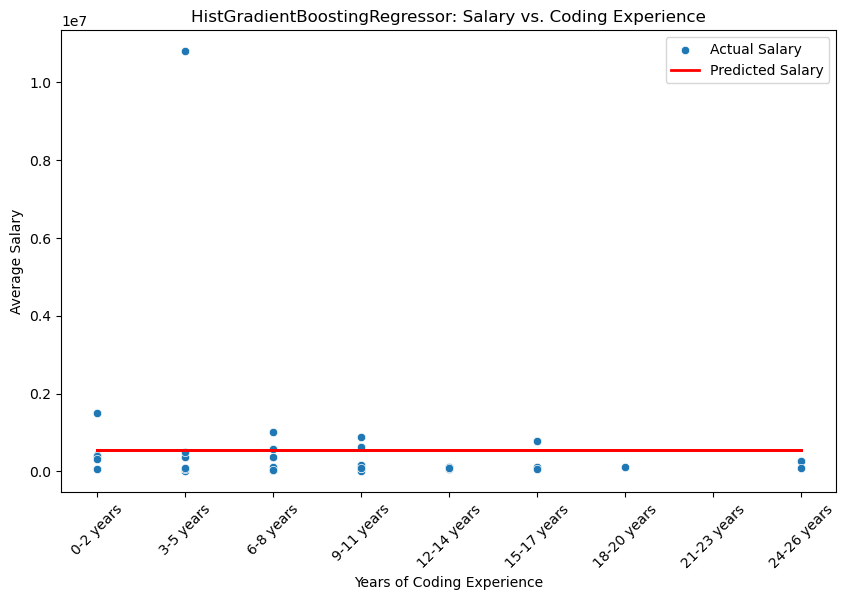

Correlation coefficient: -0.19


In [37]:
from sklearn.ensemble import HistGradientBoostingRegressor

# Define the features and target
X = df2[['CodOrdinal']]
y = df2['NetSalary']

# Train the HistGradientBoostingRegressor model
reg = HistGradientBoostingRegressor().fit(X, y)

# Predict using the model
df2['PredictedSalary2'] = reg.predict(X)

# Plot the scatter plot and regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CodOrdinal', y='NetSalary', data=df2, label='Actual Salary')
plt.plot(df2['CodOrdinal'], df2['PredictedSalary2'], color='red', linewidth=2, label='Predicted Salary')
plt.xticks(ticks=np.arange(1, 10), labels=experience_mapping.keys(), rotation=45)
plt.xlabel('Years of Coding Experience')
plt.ylabel('Average Salary')
plt.title('HistGradientBoostingRegressor: Salary vs. Coding Experience')
plt.legend()
plt.show()

# Calculate and print the correlation coefficient
correlation = df2['CodOrdinal'].corr(df2['NetSalary'])
print(f"Correlation coefficient: {correlation:.2f}")

Conclusions


Initial High Salaries for Early Career Professionals:

There is a high median salary for professionals with 0-2 years of experience. This could be due to a variety of factors such as entry-level positions in high-paying industries or companies.


Sharp Decline After Early Career:

The sharp decline in median salary after the initial 2 years suggests that professionals might face a plateau or even a decrease in salary growth as they gain more experience. This could indicate a saturation point or a shift in industry demand for mid-level experience.
Increase in Salary for Very Experienced Professionals:

The increase in median salary for those with 21-23 years and 24-26 years of experience suggests that very experienced professionals might move into higher-paying roles such as senior management, consultancy, or specialized technical roles.
Negative Correlation in Linear Regression:

The slight negative correlation seen in the linear regression plot suggests that, on average, more years of coding experience does not necessarily translate to higher salaries. This could be due to several factors such as industry shifts, changes in technology, or the devaluation of long-term experience in favor of newer skills.
Recommendations
Early Career Focus:

For new graduates or those entering the field, targeting high-paying entry-level positions or companies can be beneficial. This is the time to capitalize on higher salaries before potential declines.
Continual Skill Development:

Professionals should focus on continual skill development and staying updated with industry trends to remain competitive and increase their value in the job market.
Career Transition:

Mid-career professionals might consider transitioning into roles that value their experience, such as management, consultancy, or specialized technical positions, to counter the salary plateau.
Leveraging Experience:

For those with extensive experience, leveraging their years in the industry to move into strategic roles or consulting can lead to a significant increase in salary.

In [38]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df_new= df2.dropna(subset=['NetSalary', 'FormalEducation', 'UndergradMajor', 'ProfCodOrdinal', 'CodOrdinal'])
# Define the model including ProfCodOrdinal and CodOrdinal
model = ols('NetSalary ~ C(FormalEducation) * C(ProfCodOrdinal)*  C(CodOrdinal)* C(UndergradMajor)', data=df_new).fit()

# Perform ANOVA
anova_results = anova_lm(model, typ=2)
print(anova_results)


C:\Users\Nidhi Satyapriya\anaconda3\Lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 0
  warnings.warn('covariance of constraints does not have full '
C:\Users\Nidhi Satyapriya\anaconda3\Lib\site-packages\statsmodels\base\model.py:1900: RuntimeWarning: invalid value encountered in divide
  F /= J
C:\Users\Nidhi Satyapriya\anaconda3\Lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 0
  warnings.warn('covariance of constraints does not have full '
C:\Users\Nidhi Satyapriya\anaconda3\Lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 0
  warnings.warn('covariance of constraints does not have full '
C:\Users\Nidhi Satyapriya\anaconda3\Lib\site-packages\statsmodels\base

                                                          sum_sq     df  \
C(FormalEducation)                                           NaN    2.0   
C(ProfCodOrdinal)                                            NaN    6.0   
C(CodOrdinal)                                                NaN    7.0   
C(UndergradMajor)                                            NaN    7.0   
C(FormalEducation):C(ProfCodOrdinal)                         NaN   12.0   
C(FormalEducation):C(CodOrdinal)                             NaN   14.0   
C(ProfCodOrdinal):C(CodOrdinal)                              NaN   42.0   
C(FormalEducation):C(UndergradMajor)                         NaN   14.0   
C(ProfCodOrdinal):C(UndergradMajor)                          NaN   42.0   
C(CodOrdinal):C(UndergradMajor)                              NaN   49.0   
C(FormalEducation):C(ProfCodOrdinal):C(CodOrdinal)           NaN   84.0   
C(FormalEducation):C(ProfCodOrdinal):C(Undergra...           NaN   84.0   
C(FormalEducation):C(CodO

C:\Users\Nidhi Satyapriya\anaconda3\Lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 588, but rank is 13
  warnings.warn('covariance of constraints does not have full '


In [39]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Post-hoc test for the first significant interaction
interaction1 = df_new.assign(interaction1=df_new['ProfCodOrdinal'].astype(str) + ':' + df_new['CodOrdinal'].astype(str) + ':' + df_new['UndergradMajor'].astype(str))
tukey1 = pairwise_tukeyhsd(endog=df_new['NetSalary'], groups=interaction1['interaction1'], alpha=0.05)
print(tukey1)

# Post-hoc test for the second significant interaction
interaction2 = df_new.assign(interaction2=df_new['FormalEducation'].astype(str) + ':' + df_new['ProfCodOrdinal'].astype(str) + ':' + df_new['CodOrdinal'].astype(str))
tukey2 = pairwise_tukeyhsd(endog=df_new['NetSalary'], groups=interaction2['interaction2'], alpha=0.05)
print(tukey2)


                                                                            Multiple Comparison of Means - Tukey HSD, FWER=0.05                                                                             
                                  group1                                                                     group2                                     meandiff  p-adj      lower          upper     reject
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
        1.0:1.0:A business discipline (ex. accounting, finance, marketing)      1.0:1.0:A humanities discipline (ex. literature, history, philosophy)     43056.0    1.0  -2090028.4443  2176140.4443  False
        1.0:1.0:A business discipline (ex. accounting, finance, marketing) 1.0:1.0:Another engineering discipline (ex. civil, electrical, mechanical)   1098864.0 0.7033  -1034220.4

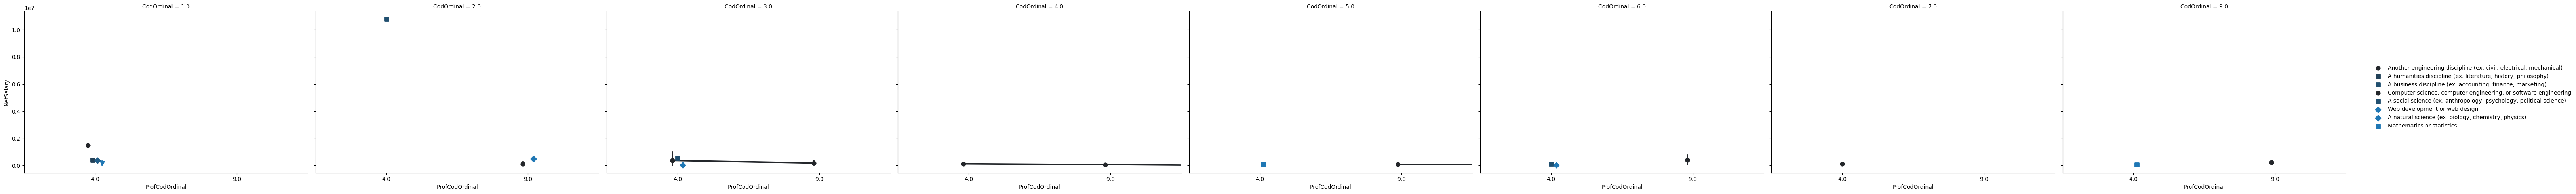

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the unique values of UndergradMajor
unique_majors = df_new['UndergradMajor'].unique()
num_unique_majors = len(unique_majors)

# Create enough markers and linestyles to cover all unique values
markers = ['o', 's', 'D', 'v', '^', '<', '>', 'P', '*', 'X'][:num_unique_majors]
linestyles = ['-', '--', ':', '-.', (0, (3, 5, 1, 5)), (0, (5, 10))][:num_unique_majors]

# Plot
g = sns.FacetGrid(df_new, col="CodOrdinal", height=5, aspect=1.5)
g.map_dataframe(sns.pointplot, x="ProfCodOrdinal", y="NetSalary", hue="UndergradMajor", dodge=True, markers=markers, linestyles=linestyles)
g.add_legend()
g.set_axis_labels("ProfCodOrdinal", "NetSalary")
plt.show()


Educational Attainment:

A Bachelor’s degree generally appears to be more financially beneficial compared to a Master’s degree or some college/university study without a degree in this dataset since it's consistently used as the reference point.

Field of Study:

Fields such as business, computer science, and engineering might offer better financial outcomes compared to social sciences, natural sciences, and humanities.

Social Sciences: These fields showed significant negative differences, and in the scatter plots, individuals in these fields would likely appear lower on the financial scale.

Business and Computer Science: These fields generally had better outcomes, so in the scatter plots, these dots would be higher, indicating better financial metrics.

Natural Sciences and Humanities: Showed mixed or negative outcomes, likely appearing lower in the scatter plots.

Coding Experience:

Early-career professionals might face challenges in achieving similar financial outcomes as those with more experience.

1-2 Years: Significant clustering with generally lower financial outcomes, reflected by a concentration of dots in the lower part of the scatter plots.

Higher Experience Levels: More spread out and possibly higher dots, indicating variability and potential improvement in financial metrics with more experience.

In [41]:
df['OpenSource'].value_counts()

No     51
Yes    48
Name: OpenSource, dtype: int64

In [42]:
df['Student'].value_counts()

No                77
Yes, full-time    16
Yes, part-time     5
Name: Student, dtype: int64

In [43]:
df['Employment'].value_counts()

Employed full-time    91
Employed part-time     8
Name: Employment, dtype: int64

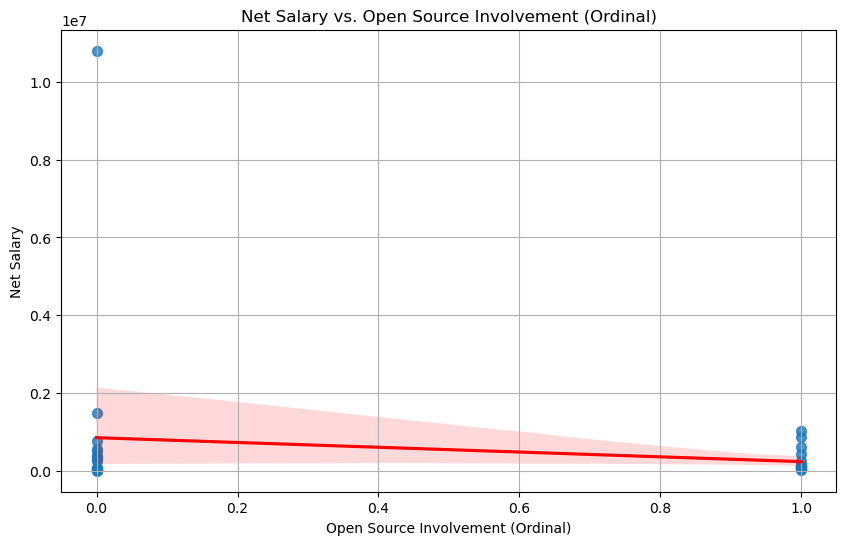

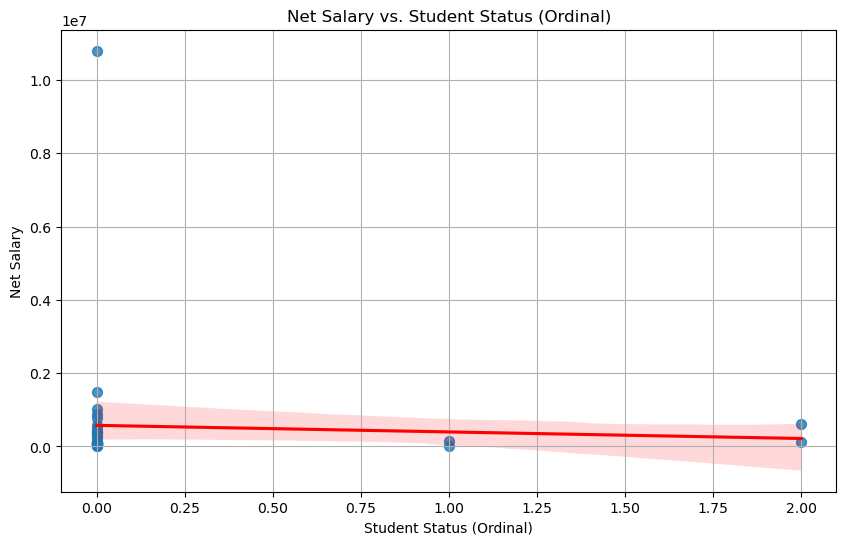

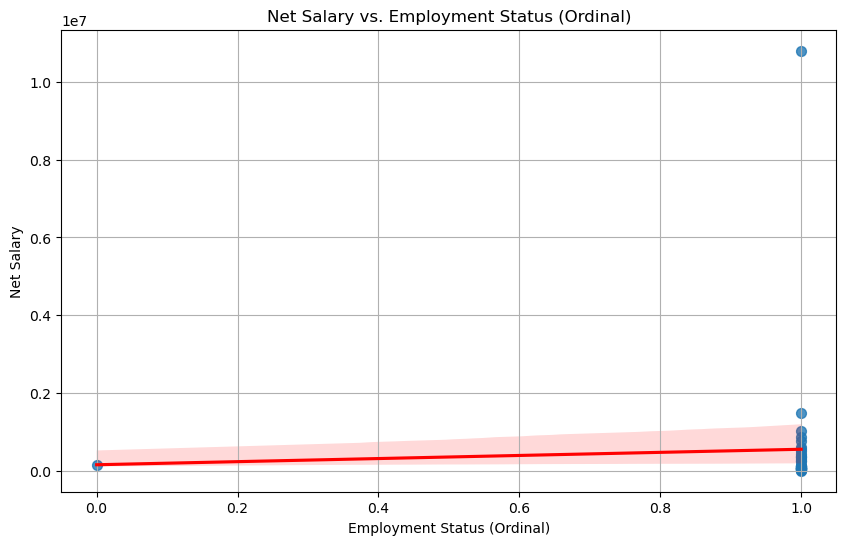

In [46]:
# Scatter plot with linear regression line for Net Salary vs. OpenSourceOrdinal
plt.figure(figsize=(10, 6))
sns.regplot(x='OpenSourceOrdinal', y='NetSalary', data=df2, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Net Salary vs. Open Source Involvement (Ordinal)')
plt.xlabel('Open Source Involvement (Ordinal)')
plt.ylabel('Net Salary')
plt.grid(True)
plt.show()

# Scatter plot with linear regression line for Net Salary vs. StudentOrdinal
plt.figure(figsize=(10, 6))
sns.regplot(x='StudentOrdinal', y='NetSalary', data=df2, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Net Salary vs. Student Status (Ordinal)')
plt.xlabel('Student Status (Ordinal)')
plt.ylabel('Net Salary')
plt.grid(True)
plt.show()

# Scatter plot with linear regression line for Net Salary vs. EmploymentOrdinal
plt.figure(figsize=(10, 6))
sns.regplot(x='EmploymentOrdinal', y='NetSalary', data=df2, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Net Salary vs. Employment Status (Ordinal)')
plt.xlabel('Employment Status (Ordinal)')
plt.ylabel('Net Salary')
plt.grid(True)
plt.show()

In [52]:
# Creating ordinal columns in df2
df2['OpenSourceOrdinal'] = df['OpenSource'].map({'No': 0, 'Yes': 1})
df2['StudentOrdinal'] = df['Student'].map({'No': 0, 'Yes, part-time': 1, 'Yes, full-time': 2})
df2['EmploymentOrdinal'] = df['Employment'].map({'Employed part-time': 0, 'Employed full-time': 1})

# Checking the relations with NetSalary
# Using correlation
print(df2[['OpenSourceOrdinal', 'StudentOrdinal', 'EmploymentOrdinal', 'NetSalary']].corr())

# Using ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Define the model
model = ols('NetSalary ~ C(NetSalary)*C(OpenSourceOrdinal)* C(StudentOrdinal)* C(EmploymentOrdinal)', data=df2).fit()

# Perform ANOVA
anova_results = anova_lm(model, typ=2)
print(anova_results)


                   OpenSourceOrdinal  StudentOrdinal  EmploymentOrdinal  \
OpenSourceOrdinal           1.000000        0.215666          -0.164399   
StudentOrdinal              0.215666        1.000000          -0.283642   
EmploymentOrdinal          -0.164399       -0.283642           1.000000   
NetSalary                  -0.179206       -0.051045           0.037159   

                   NetSalary  
OpenSourceOrdinal  -0.179206  
StudentOrdinal     -0.051045  
EmploymentOrdinal   0.037159  
NetSalary           1.000000  
                                                          sum_sq    df  \
C(NetSalary)                                       -1.216923e+14  33.0   
C(OpenSourceOrdinal)                                         NaN   1.0   
C(StudentOrdinal)                                            NaN   2.0   
C(EmploymentOrdinal)                                         NaN   1.0   
C(NetSalary):C(OpenSourceOrdinal)                   5.153163e+12  33.0   
C(NetSalary):C(StudentOrd

C:\Users\Nidhi Satyapriya\anaconda3\Lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\Nidhi Satyapriya\anaconda3\Lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
C:\Users\Nidhi Satyapriya\anaconda3\Lib\site-packages\statsmodels\base\model.py:1900: RuntimeWarning: invalid value encountered in divide
  F /= J
C:\Users\Nidhi Satyapriya\anaconda3\Lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 0
  warnings.warn('covariance of constraints does not have full '
C:\Users\Nidhi Satyapriya\anaconda3\Lib\site-packages\statsmodels\bas

Overall Interpretation


The main effects of OpenSourceOrdinal, StudentOrdinal, and EmploymentOrdinal individually may not be significant, but their interactions, especially involving NetSalary, are highly significant.

OpenSourceOrdinal:

Positive Correlation with StudentOrdinal (0.2157): Indicates that students are more likely to participate in open-source activities. This could be because students might have more time or incentives (like course projects) to engage in open-source projects.

Negative Correlation with EmploymentOrdinal (-0.1644): Suggests that those more involved in open-source projects may not be as highly employed or may be employed in roles that value open-source contributions less.

Negative Correlation with NetSalary (-0.1792): Indicates that higher involvement in open-source activities might be associated with lower net salaries. This could imply that individuals heavily involved in open-source work might prioritize other factors over salary, such as learning, community contribution, or working in lower-paying but more flexible or mission-driven roles.

StudentOrdinal:

Negative Correlation with EmploymentOrdinal (-0.2836): Indicates that higher student status is associated with lower employment status, which is expected since full-time students are less likely to be fully employed.

Weak Negative Correlation with NetSalary (-0.0510): Suggests that being a student has a slight negative impact on net salary, which makes sense as students typically have lower earnings compared to fully employed individuals.

EmploymentOrdinal:

Weak Positive Correlation with NetSalary (0.0372): Suggests that there is a slight positive relationship between employment status and net salary. This is intuitive, as higher employment status typically correlates with higher earnings.






Final Thoughts


This analysis highlights the complex relationship between education, experience, and salary. While higher education generally leads to higher earnings, specific skills, experience, and industry demand play crucial roles in determining individual salary outcomes. Continuous skill development and strategic career transitions are key to maximizing earning potential in a dynamic job market.

Key Insights

1) Based on general trends  and repeated patterns, it is clear that pursuing a Bachelor‚Äôs degree (BA, BS, B.Eng., etc.) is the most beneficial Formal Education. It offers a good median, shows a wide range of salaries with some outliers of high salaries indicating people with this degree coupled with some other unique skills and experience can earn considerably higher salaries than the rest.
2) Doing a Master's degree can a considerate hike to the salary, however it is not as much as one expects.
3) People without a professional degree but with relevant skills and experience are making huge money, highlighting the importance of gaining real-world problem-solving skills.
4) However, FormalEducation alone is not significant to determine the salaries of the individual. 'UnderGradMajor' and combined interactions of 'ProfCoding'-'CodingYears' and 'Student'-'YearsCoding'-'YearsCodingProf' significantly impact the salary.
5) 'Business Discipline' , 'Engineering and Computer Science' are the most rewarding majors. Social Science offers the highest median, however, due to lack of data, it is unsafe to claim this.
6) Coding Experience: Early-career professionals might face challenges in achieving similar financial outcomes as those with more experience.

    a) 1-2 Years: Significant clustering with generally lower financial outcomes, reflected by a concentration of dots in the   lower part of the scatter plots.
    
    b) Higher Experience Levels: More spread out and possibly higher dots, indicating variability and potential improvement in financial metrics with more experience.
7) Thus, we can conclude that the salary doesn't only depend upon the Higher Education of an individual, but also on the current market trends and industrial needs and experience. Based on these several parameters, an insight into the Salary of individuals have been provided.